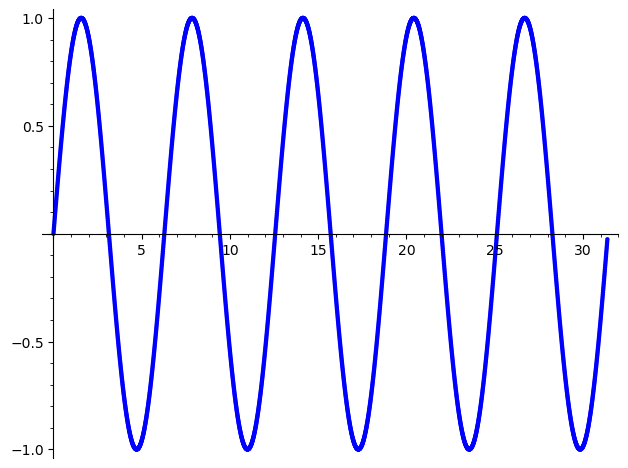

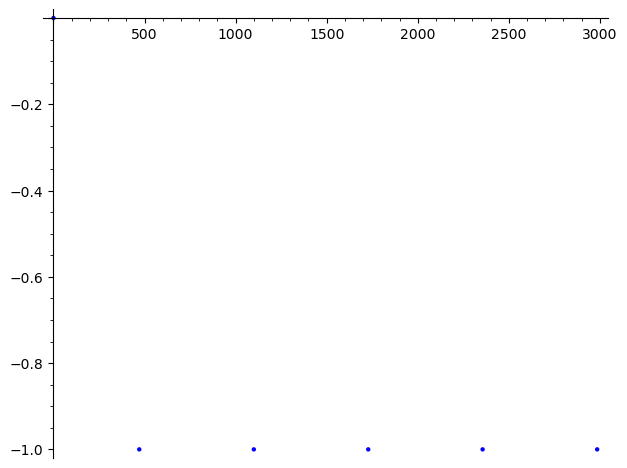

In [1]:
def lower_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0<val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end<val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding>val_k:
            if val_next>val_k:
                envelope.append((k,val_k))
    return envelope
        
        
sine_curve=[[k/100,sin(k/100)] for k in range(0,10*314)]
pls=list_plot(sine_curve)
show(pls)
env=lower_envelope_pairlist(sine_curve)
pls2=list_plot(env)
show(pls2)

In [ ]:
import pickle
from sage.all import sigma, nth_prime
import ast

def nieburTau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def h(n): 
    return nieburTau(nth_prime(n)) # i.e., tauPrime(n)

c=1
j_list=[c,1] 
for n in [2..299]:
    print(n)
    partial_sum=0
    for r in [1..n-1]:
        partial_sum=partial_sum+j_list[r]*h(n-r) 
    
    j_n=n*h(n)-partial_sum #per lemma 2.2
    j_list.append(j_n)

with open('/Users/barrybrent/data/run5oct25no1.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) #output snipped

In [ ]:
import pickle
with open('/Users/barrybrent/data/run5oct25no1.txt', 'rb') as rfile:
    j_list = pickle.load(rfile) #tauPrime(n) j-companion

def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
log_maxes_list=[]
dets=[]
tests=[]
for n in range(2,200):
    pl=P_matrix(j_list[:n])
    det=pl.det()
    #print((n,test,moebius(n-1)))
    print(n)
    dets.append((n,det))
    matrix_list+=[(n,pl)]
    cp=pl.charpoly()
    charpol_list+=[(n,cp)]
    roots = cp.roots(ring=CIF, multiplicities=False)       
    roots_list+=[(n,roots)]
    centers=[r.center() for r in roots]
    pairs = [(z.real(), z.imag()) for z in centers]


    centers_list+=[(n,centers)]
    max_diameter=max([r.diameter() for r in roots])
    max_diameter_list+=[(n,max_diameter)]
    aar = [r.abs() for r in roots]
    aar_list+=[(n,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list+=[(n,minn)]
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
        log_mins_list.append((n,log_minn))
        maxx = max(aar)  
        maxes_list+=[(n,maxx)]
        maxes_list.append((n,maxx))
        if maxx>0:
            log_maxx=log(maxx)
            log_maxes_list.append((n,log_maxx))
   
    
p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
mml=[pair[1] for pair in log_mins_list]
print("minimum logarithm of minimum modulus:",min(mml))
p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
print("MAXIMUM MODULI")
p.show()
p = list_plot(log_maxes_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MAXIMUM MODULI")
p.show()
with open('/Users/barrybrent/data/run5oct25no2.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped

with open('/Users/barrybrent/data/run5oct25no3.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped

with open('/Users/barrybrent/data/run5oct25no4.txt', 'wb') as wfile:
    pickle.dump(max_diameter_list, wfile) #output snipped

with open('/Users/barrybrent/data/run5oct25no5.txt', 'wb') as wfile:
    pickle.dump(dets, wfile) #output snipped
    
with open('/Users/barrybrent/data/run5oct25no6.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile) #output snipped

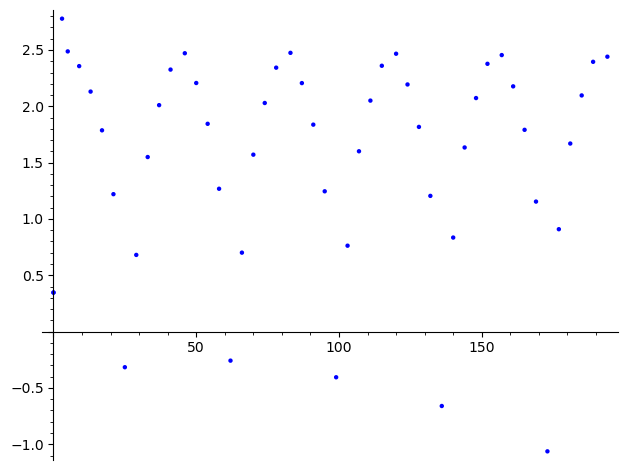

In [3]:
import pickle
with open('/Users/barrybrent/data/run5oct25no6.txt', 'rb') as rfile:
    log_mins_list = pickle.load(rfile)

env1=lower_envelope_pairlist(log_mins_list)
pls1=list_plot(env1)
show(pls1)

In [7]:
def lower_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0<val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end<val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding>val_k:
            if val_next>val_k:
                envelope.append((k,val_k))
    return envelope

def difference_table(lst):
    diffs=[]
    for k in range(0,len(lst)):
        diff=lst[k]-lst[k-1]
        diffs=diffs+[diff]
    return diffs
   
import pickle

with open('/Users/barrybrent/data/run5oct25no6.txt', 'rb') as rfile:
    log_mins_list = pickle.load(rfile)

env=lower_envelope_pairlist(log_mins_list)
n_list=[pair[0] for pair in env]
dt=difference_table(n_list)
print(dt)
fives=[]
for k in range(0,len(dt)-1):
    if dt[k]==5:
        fives.append(k)
print(fives)

[-194, 0, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5]
[13, 22, 31, 40]
